In [167]:
import pandas as pd
import pandas.io.sql as sqlio

In [168]:
pip install pandasql

In [169]:
from pandasql import sqldf

In [170]:
df_irr = pd.read_csv('/Hackathon Data.csv')

<ipython-input-170-1cc67eed6b18>:1: DtypeWarning: Columns (9,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_irr = pd.read_csv('/Hackathon Data.csv')


# New Section

# New Section

In [172]:
pd.set_option('display.max_columns', None)

In [173]:
df_irr.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed', 'Global Horizontal UV Irradiance (280-400nm)',
       'Global Horizontal UV Irradiance (295-385nm)', 'Value', 'Unnamed: 25'],
      dtype='object')

In [174]:
df_irr.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm),Value,Unnamed: 25
0,2011,5,14,0,0,11.4,0,0,0,8,10.1,0,0,0,0,91.68,119.80,0.16,984,2.7,347,4.9,0.0,0.0,0.072630554,NaN
1,2011,5,14,0,30,11.3,0,0,0,4,10.1,0,0,0,0,92.29,119.46,0.16,984,2.6,349,4.7,0.0,0.0,0,NaN
2,2011,5,14,1,0,11.2,0,0,0,4,10.0,0,0,0,0,92.03,118.34,0.16,984,2.6,350,4.6,0.0,0.0,0,NaN
3,2011,5,14,1,30,11.0,0,0,0,4,10.0,0,0,0,0,93.25,116.47,0.16,984,2.6,350,4.5,0.0,0.0,0,NaN
4,2011,5,14,2,0,10.9,0,0,0,7,9.7,0,0,0,0,92.48,113.93,0.16,984,2.6,350,4.4,0.0,0.0,0,NaN


In [175]:
df_irr.shape

(186480, 26)

In [176]:
df_energy = pd.read_csv('/Energy data.csv')

In [177]:
df_energy.head()

,Timestamp,Value
0,2011-05-14T00:00:00Z,0.072630554
1,2011-05-14T00:30:00Z,0
2,2011-05-14T01:00:00Z,0
3,2011-05-14T01:30:00Z,0
4,2011-05-14T02:00:00Z,0


In [178]:
df_energy.dtypes

Timestamp    object
Value        object
dtype: object

In [179]:
df_energy['Timestamp'] = pd.to_datetime(df_energy['Timestamp'])

# Convert 'FloatColumn' from float64 to int
df_energy['Value'] = pd.to_numeric(df_energy['Value'], errors='coerce').astype(float)

In [180]:
df_energy.head()

,Timestamp,Value
0,2011-05-14 00:00:00+00:00,0.072631
1,2011-05-14 00:30:00+00:00,0.000000
2,2011-05-14 01:00:00+00:00,0.000000
3,2011-05-14 01:30:00+00:00,0.000000
4,2011-05-14 02:00:00+00:00,0.000000


In [181]:
import pytz
cst_timezone = pytz.timezone('US/Central')  # US/Central is the timezone code for CST
utc_timezone = pytz.timezone('UTC')
df_energy['Timestamp_CST'] = df_energy['Timestamp'].dt.tz_convert('US/Central')
#df_energy['Timestamp_CST'] = pd.to_datetime(df_energy['Timestamp']).dt.tz_localize(utc_timezone).dt.tz_convert(cst_timezone)
# Display the DataFrame with the converted timestamp column
print(df_energy)

                       Timestamp     Value             Timestamp_CST
0      2011-05-14 00:00:00+00:00  0.072631 2011-05-13 19:00:00-05:00
1      2011-05-14 00:30:00+00:00  0.000000 2011-05-13 19:30:00-05:00
2      2011-05-14 01:00:00+00:00  0.000000 2011-05-13 20:00:00-05:00
3      2011-05-14 01:30:00+00:00  0.000000 2011-05-13 20:30:00-05:00
4      2011-05-14 02:00:00+00:00  0.000000 2011-05-13 21:00:00-05:00
...                          ...       ...                       ...
186475 2021-12-31 21:30:00+00:00  0.000000 2021-12-31 15:30:00-06:00
186476 2021-12-31 22:00:00+00:00  0.054113 2021-12-31 16:00:00-06:00
186477 2021-12-31 22:30:00+00:00  0.162339 2021-12-31 16:30:00-06:00
186478 2021-12-31 23:00:00+00:00  0.162339 2021-12-31 17:00:00-06:00
186479 2021-12-31 23:30:00+00:00  0.162340 2021-12-31 17:30:00-06:00

[186480 rows x 3 columns]


In [182]:
df_energy = df_energy.iloc[10:,:].reset_index(drop=True)

In [183]:
df_energy = df_energy.drop(columns = ['Timestamp'])

In [184]:
df_energy

,Value,Timestamp_CST
0,0.000000,2011-05-14 00:00:00-05:00
1,0.000000,2011-05-14 00:30:00-05:00
2,0.000000,2011-05-14 01:00:00-05:00
3,0.000000,2011-05-14 01:30:00-05:00
4,0.000000,2011-05-14 02:00:00-05:00
...,...,...
186465,0.000000,2021-12-31 15:30:00-06:00
186466,0.054113,2021-12-31 16:00:00-06:00
186467,0.162339,2021-12-31 16:30:00-06:00
186468,0.162339,2021-12-31 17:00:00-06:00


In [185]:
df_energy[df_energy['Value']>38]

,Value,Timestamp_CST
49383,5.510000e+29,2014-03-07 18:30:00-06:00
49384,5.510000e+29,2014-03-07 19:00:00-06:00
49385,5.510000e+29,2014-03-07 19:30:00-06:00
49386,5.510000e+29,2014-03-07 20:00:00-06:00
49387,5.510000e+29,2014-03-07 20:30:00-06:00
...,...,...
186446,9.160280e+01,2021-12-31 06:00:00-06:00
186447,9.160280e+01,2021-12-31 06:30:00-06:00
186448,9.160280e+01,2021-12-31 07:00:00-06:00
186449,9.160280e+01,2021-12-31 07:30:00-06:00


In [186]:
df_irr['Energy'] = df_energy['Value']

In [187]:
df_final = df_irr

In [188]:
#df_final = df_final.iloc[:186470,:].reset_index(drop=True)

In [189]:
df_final = df_final.iloc[:-10,:].reset_index(drop=True)

In [190]:
print(df_final.describe())

                Year          Month            Day           Hour  \
count  186470.000000  186470.000000  186470.000000  186470.000000   
mean     2016.170912       6.651708      15.765206      11.499491   
std         3.075225       3.425930       8.800575       6.922033   
min      2011.000000       1.000000       1.000000       0.000000   
25%      2014.000000       4.000000       8.000000       5.000000   
50%      2016.000000       7.000000      16.000000      11.000000   
75%      2019.000000      10.000000      23.000000      17.000000   
max      2021.000000      12.000000      31.000000      23.000000   

             Minute    Temperature   Clearsky DHI   Clearsky DNI  \
count  186470.00000  186470.000000  186470.000000  186470.000000   
mean       15.00000      10.444590      44.802783     346.067689   
std        15.00004      12.315954      54.985616     380.661624   
min         0.00000     -35.400000       0.000000       0.000000   
25%         0.00000       0.500000    

In [192]:
df_final = df_final[df_final['Energy']<=38]

# New Section

In [193]:
df_final

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm),Value,Unnamed: 25,Energy
0,2011,5,14,0,0,11.4,0,0,0,8,10.1,0,0,0,0,91.68,119.80,0.16,984,2.7,347,4.9,0.0,0.0,0.072630554,NaN,0.000000
1,2011,5,14,0,30,11.3,0,0,0,4,10.1,0,0,0,0,92.29,119.46,0.16,984,2.6,349,4.7,0.0,0.0,0,NaN,0.000000
2,2011,5,14,1,0,11.2,0,0,0,4,10.0,0,0,0,0,92.03,118.34,0.16,984,2.6,350,4.6,0.0,0.0,0,NaN,0.000000
3,2011,5,14,1,30,11.0,0,0,0,4,10.0,0,0,0,0,93.25,116.47,0.16,984,2.6,350,4.5,0.0,0.0,0,NaN,0.000000
4,2011,5,14,2,0,10.9,0,0,0,7,9.7,0,0,0,0,92.48,113.93,0.16,984,2.6,350,4.4,0.0,0.0,0,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186465,2021,12,31,16,30,-0.2,18,107,22,7,-0.5,9,0,86,9,97.77,88.02,0.74,979,0.9,9,4.6,0.0,0.0,0.050000001,NaN,0.000000
186466,2021,12,31,17,0,-0.6,0,0,0,7,-1.4,0,0,0,0,94.02,93.14,0.74,979,0.9,7,4.7,0.0,0.0,0.023,NaN,0.054113
186467,2021,12,31,17,30,-0.6,0,0,0,7,-1.4,0,0,0,0,94.02,98.17,0.74,979,0.9,7,4.7,0.0,0.0,0.008,NaN,0.162339
186468,2021,12,31,18,0,-10.7,0,0,0,7,-11.9,0,0,0,0,90.92,103.35,0.80,999,0.4,84,1.7,0.0,0.0,0,NaN,0.162339


In [194]:
df_final = df_final.drop(columns=['Year','Day','Hour','Minute','Clearsky DHI','Clearsky DNI','DHI','DNI','Global Horizontal UV Irradiance (280-400nm)','Global Horizontal UV Irradiance (295-385nm)','Value','Unnamed: 25'])

In [195]:
df_final = df_final[(df_final['GHI']!=0)&(df_final['Energy']!=0)]

In [196]:
df_final['Relative GHI'] = df_final['GHI']/df_final['Clearsky GHI']

In [197]:
conditions = [
    (df_final['Wind Direction'] < 90),
    ((df_final['Wind Direction'] >= 90) & (df_final['Wind Direction'] < 180)),
    ((df_final['Wind Direction'] >= 180) & (df_final['Wind Direction']<270)),
     (df_final['Wind Direction']>=270)
]

In [198]:
import numpy as np

In [202]:
categories = ['NE', 'NW', 'SW', 'SE']

# Use pd.cut() to categorize the 'value' column
df_final['Wind Direction_1'] = np.select(conditions, categories, default='Other')


In [203]:
df_final

,Month,Temperature,Cloud Type,Dew Point,Fill Flag,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Energy,Relative GHI,Wind Direction_1
15,5,10.2,7,7.7,0,95,84.42,61.54,0.16,985,2.7,4.7,0.070356,0.225653,SE
16,5,10.4,7,7.8,0,194,83.81,55.95,0.16,985,2.7,4.6,0.071506,0.379648,SE
17,5,10.6,7,7.8,0,183,82.70,50.40,0.16,985,2.7,4.7,0.260078,0.305509,SE
18,5,10.8,7,7.9,0,129,82.42,44.95,0.16,985,2.6,4.8,0.150646,0.189985,SE
19,5,10.9,7,7.9,0,144,81.88,39.69,0.16,985,2.6,4.8,0.195115,0.191744,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186453,12,0.2,0,-1.5,0,333,88.34,68.63,0.74,977,1.2,4.4,0.015500,0.909836,NE
186454,12,0.7,0,-0.5,0,354,91.38,66.63,0.74,977,1.2,4.2,0.015500,0.874074,NE
186455,12,1.0,0,-0.6,0,419,89.34,65.31,0.74,976,1.2,3.9,0.050000,0.974419,NE
186456,12,1.2,0,0.0,0,420,92.01,64.70,0.74,976,1.1,3.6,0.023000,0.952381,NE


In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel


In [206]:
X = df_final.drop('Energy', axis=1)
y = df_final['Energy']

In [207]:
X = pd.get_dummies(X, columns=['Month', 'Cloud Type', 'Fill Flag','Wind Direction_1'])  # List your categorical columns


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [210]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [211]:
lasso_model = Lasso(alpha=0.01, random_state=42)
lasso_model.fit(X_train_scaled, y_train)


Lasso(alpha=0.01, random_state=42)

In [212]:
feature_selector = SelectFromModel(lasso_model, prefit=True)
X_train_lasso = feature_selector.transform(X_train_scaled)
X_test_lasso = feature_selector.transform(X_test_scaled)

In [213]:
lasso_model_selected = Lasso(alpha=0.01, random_state=42)
lasso_model_selected.fit(X_train_lasso, y_train)


Lasso(alpha=0.01, random_state=42)

In [214]:
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

In [216]:
lasso_pred = lasso_model_selected.predict(X_test_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)

In [218]:
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R-squared:", rf_r2)
print("\nLinear Regression (Lasso) RMSE:", lasso_rmse)
print("Linear Regression (Lasso) R-squared:", lasso_r2)

Random Forest RMSE: 4.354041579392287
Random Forest R-squared: 0.7534570546614299

Linear Regression (Lasso) RMSE: 4.824249565561579
Linear Regression (Lasso) R-squared: 0.697331678236965


In [229]:
# Step 5: Get Variable Importance for Random Forest
rf_feature_importance = rf_model.feature_importances_

In [230]:
# Create a DataFrame to store feature names and their importance scores
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importance})

In [231]:
# Sort the DataFrame by importance score in descending order
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

In [232]:
import seaborn as sns

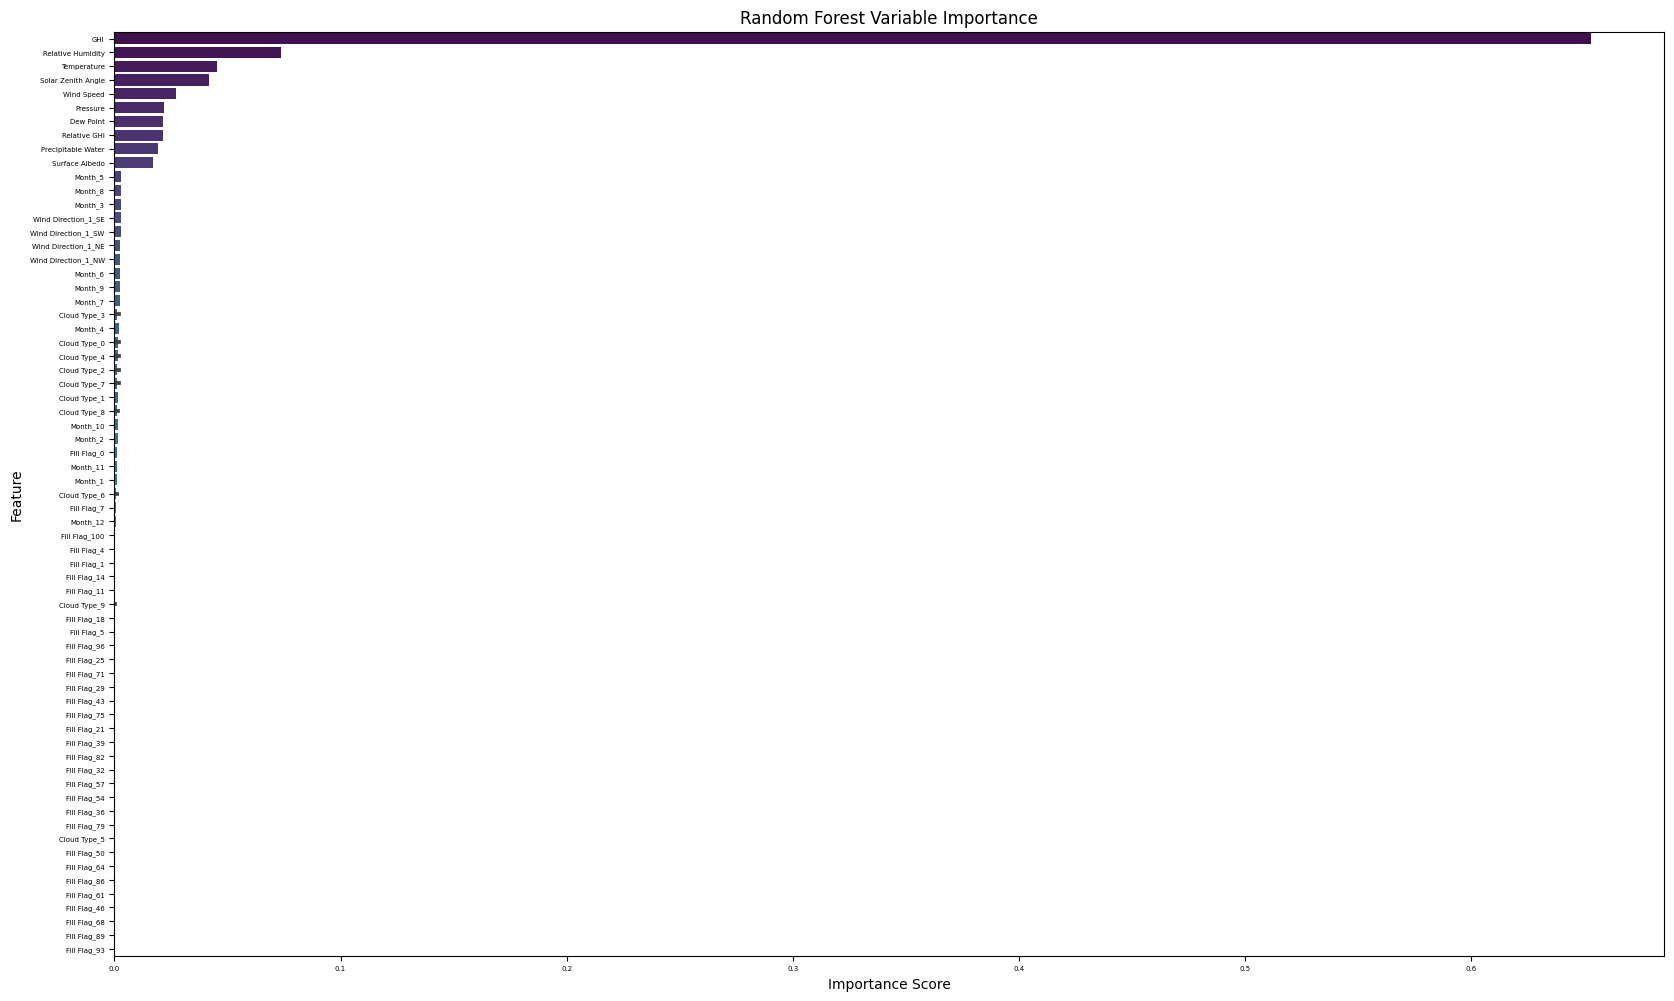

In [233]:
# Step 6: Plot Variable Importance
plt.figure(figsize=(20, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, palette='viridis')
plt.title('Random Forest Variable Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()
plt.show()

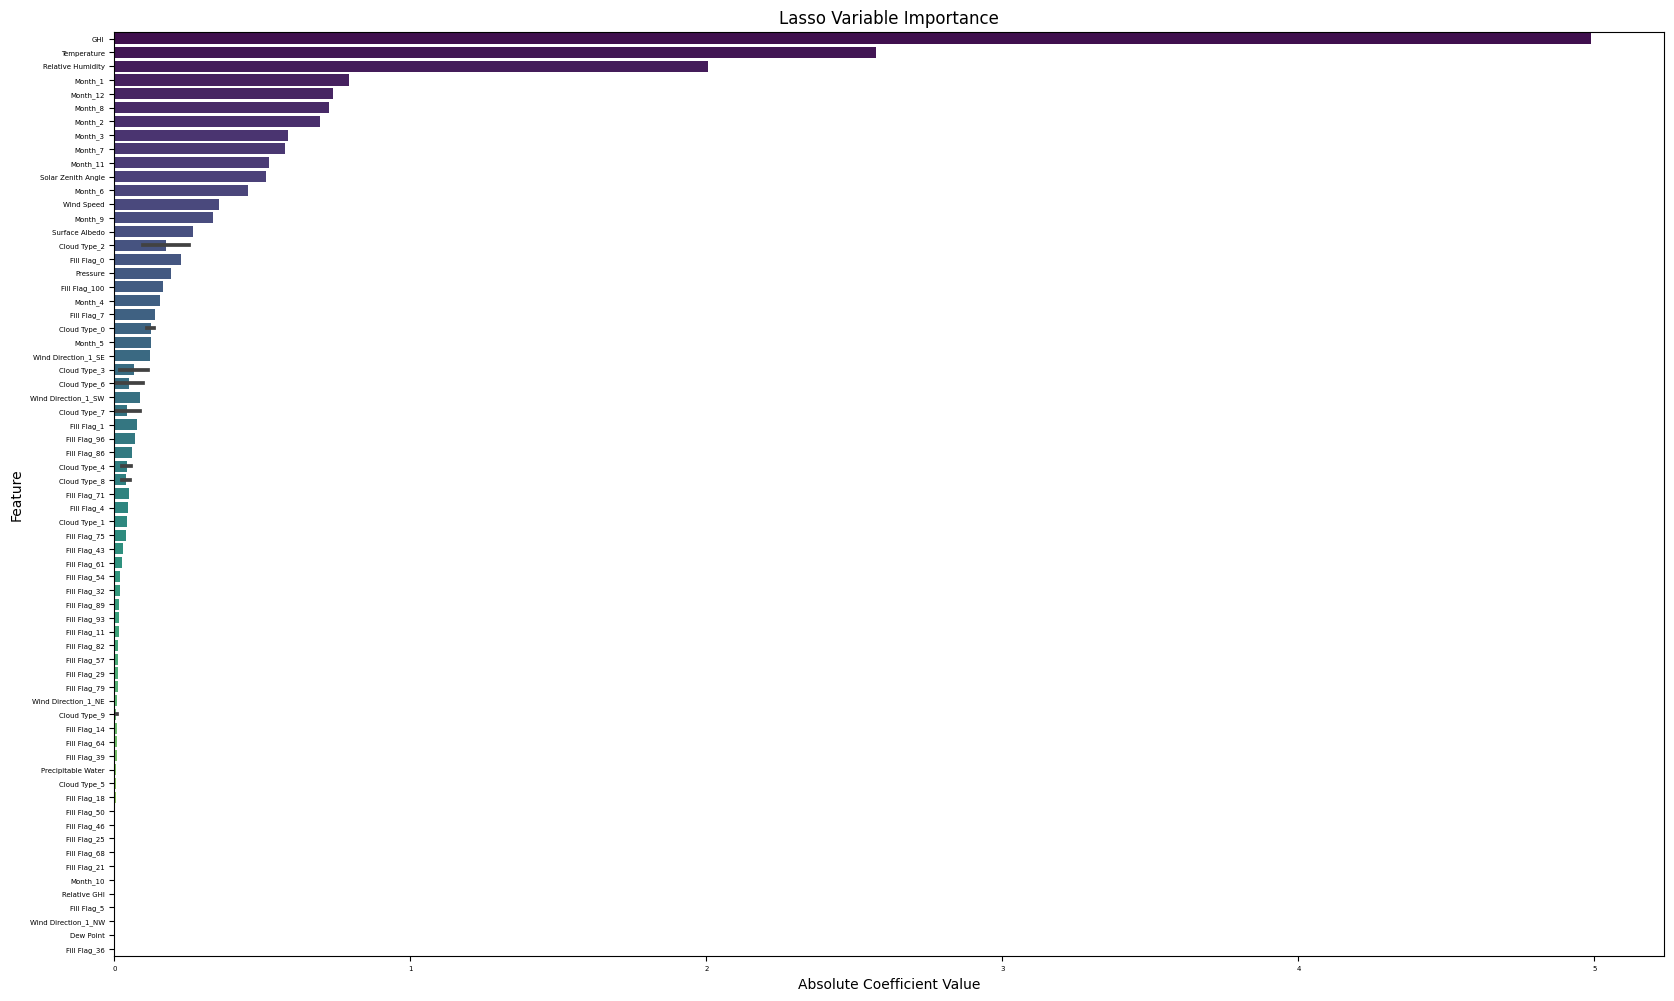

In [234]:
# Step 4: Get Variable Importance for Lasso
lasso_coefficients = lasso_model.coef_

# Calculate the absolute values of coefficients as feature importance
lasso_feature_importance = np.abs(lasso_coefficients)

# Create a DataFrame to store feature names and their importance scores
feature_importance_df_lasso = pd.DataFrame({'Feature': X.columns, 'Importance': lasso_feature_importance})

# Sort the DataFrame by importance score in descending order
feature_importance_df_lasso = feature_importance_df_lasso.sort_values(by='Importance', ascending=False)

# Step 5: Plot Variable Importance
plt.figure(figsize=(20, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_lasso, palette='viridis')
plt.title('Lasso Variable Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()